In [1]:
from FinancialMachineLearning.features.microstructure import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os
os.chdir('..')
os.chdir('..')
os.getcwd()

'/Users/junghunlee/Desktop/Pycharm/FinancialMachineLearning'

In [3]:
data = pd.read_parquet('./Data/clean_IVE_fut_prices.parq')

#### Tick rule

In [4]:
aggressor = TickRule(data['price'])
aggressor

dates
2009-09-28 09:30:00    1.0
2009-09-28 09:30:00   -1.0
2009-09-28 09:31:32    1.0
2009-09-28 09:31:33    1.0
2009-09-28 09:31:50    1.0
                      ... 
2018-10-05 15:59:59    1.0
2018-10-05 15:59:59    1.0
2018-10-05 16:00:00    1.0
2018-10-05 16:10:00    1.0
2018-10-05 18:30:00    1.0
Length: 1416200, dtype: float64

#### The Roll Model

In [5]:
spread, noise = RollModel(data['price'])
spread, noise

(0.29004042406268316, -0.16645774734381774)

#### Range Volatility

In [6]:
from FinancialMachineLearning.barsampling.standard_bar import dollarBar

date_time = pd.Series(data.index)
data.index = range(len(data))
new_data = pd.concat([date_time, data['price'], data['v']], axis=1)
new_data.columns = ['date', 'price', 'volume']
print(new_data.head(20))
print('Rows:', new_data.shape[0])
new_data.to_csv('./Data/maks_tick_data.csv', index=False)

                  date    price  volume
0  2009-09-28 09:30:00  50.7900     100
1  2009-09-28 09:30:00  50.7100     638
2  2009-09-28 09:31:32  50.7500     100
3  2009-09-28 09:31:33  50.7500     100
4  2009-09-28 09:31:50  50.7500     300
5  2009-09-28 09:31:51  50.7500     300
6  2009-09-28 09:32:06  50.7800     300
7  2009-09-28 09:32:06  50.7800     500
8  2009-09-28 09:32:06  50.7800     100
9  2009-09-28 09:32:56  50.8226     100
10 2009-09-28 09:33:02  50.8100     500
11 2009-09-28 09:33:02  50.8100     300
12 2009-09-28 09:33:08  50.8200     500
13 2009-09-28 09:33:08  50.8200     298
14 2009-09-28 09:33:35  50.8100     100
15 2009-09-28 09:33:54  50.8200     100
16 2009-09-28 09:33:54  50.8200     400
17 2009-09-28 09:34:58  50.8000     100
18 2009-09-28 09:34:58  50.8000     200
19 2009-09-28 09:36:32  50.8500     300
Rows: 1416200


In [7]:
threshold = 1000000
dv = dollarBar('./Data/maks_tick_data.csv', threshold = threshold, batch_size = 1000000, verbose = True)
dv

Reading data in batches:
Batch number: 0
Batch number: 1
Returning bars 


,date_time,open,high,low,close,volume
0,2009-09-28 09:46:35,50.7900,51.0700,50.710,51.07,19844
1,2009-09-28 09:53:49,51.0700,51.1500,51.050,51.14,20324
2,2009-09-28 09:55:26,51.1400,51.1500,51.129,51.14,19622
3,2009-09-28 10:02:52,51.1400,51.2600,51.080,51.25,22319
4,2009-09-28 10:10:21,51.2500,51.2900,51.190,51.29,21519
...,...,...,...,...,...,...
50761,2018-10-05 15:58:23,116.2425,116.2425,116.160,116.19,9647
50762,2018-10-05 15:59:20,116.2000,116.2125,116.150,116.18,8821
50763,2018-10-05 15:59:55,116.1800,116.2100,116.140,116.19,9196
50764,2018-10-05 15:59:59,116.2000,116.2000,116.190,116.20,9700


In [8]:
vol = RangeVolatility(dv.high, dv.low, window = 50)

Text(0.5, 1.0, 'Estimated Range Volatility')

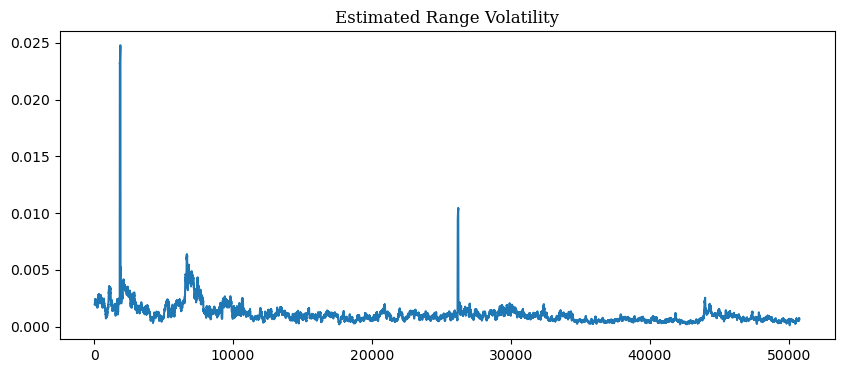

In [9]:
plt.figure(figsize = (10,4))
vol.plot()
plt.title('Estimated Range Volatility', fontsize = 12, fontfamily = 'Serif')

Text(0.5, 1.0, 'Dollar Value Bars')

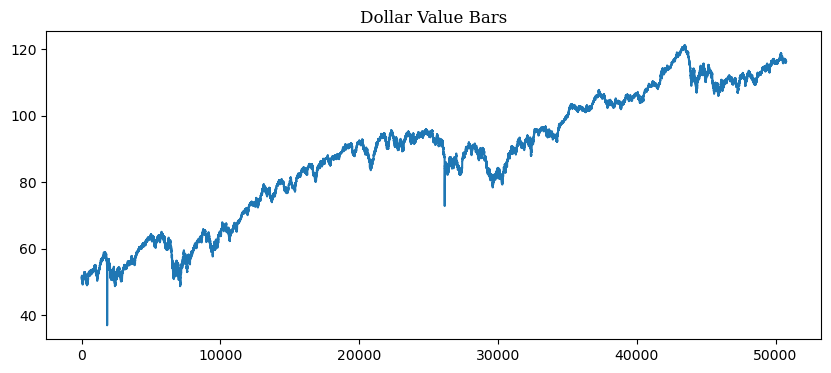

In [10]:
plt.figure(figsize = (10,4))
dv.close.plot()
plt.title('Dollar Value Bars', fontsize = 12, fontfamily = 'Serif')

#### Corwin Schultz Spread

In [11]:
spread = CorwinSchultzSpread(dv.high, dv.low, 100)
vol = BeckerParkinsonVolatility(dv.high, dv.low, 100)

Text(0.5, 1.0, 'Corwin Schultz Spread')

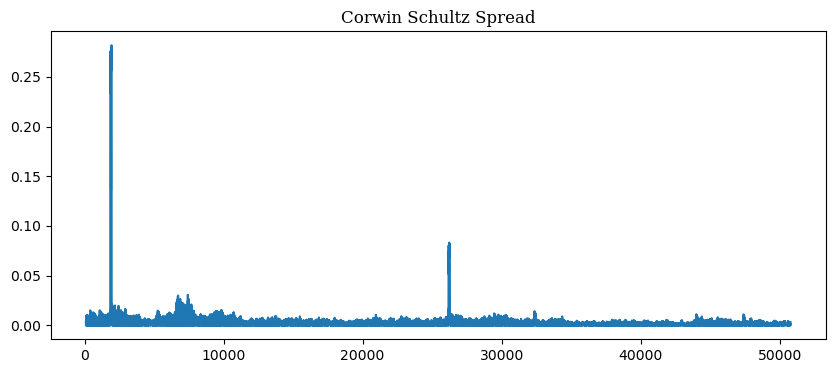

In [12]:
plt.figure(figsize = (10,4))
plt.plot(spread)
plt.title('Corwin Schultz Spread', fontsize = 12, fontfamily = 'Serif')

Text(0.5, 1.0, 'Estimated Backer Parkinson Volatility')

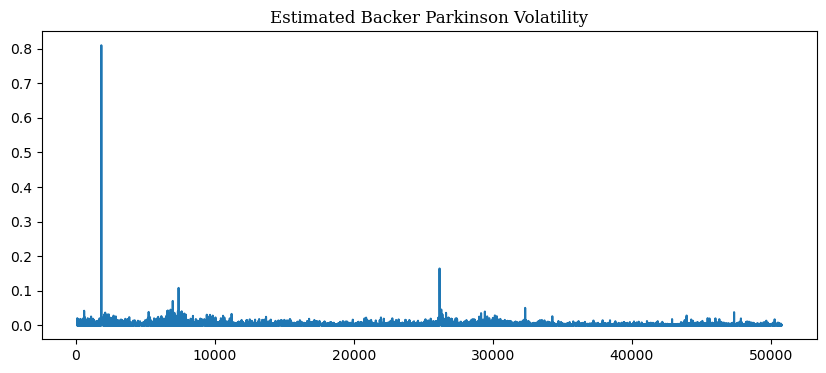

In [13]:
plt.figure(figsize = (10,4))
plt.plot(vol)
plt.title('Estimated Backer Parkinson Volatility', fontsize = 12, fontfamily = 'Serif')